<H1 style="text-align:center"> Slots Game Performance Predictor - Feed Forward Neural Network model</H1>
<H2 style="text-align:center">Model Training notebook</H2>


In this notebook we will train our feed forward neural network model to predict the success category of Slots Games based on different aspects of the game's reward system.

# Libraries

In [1]:
import pyodbc
import pandas as pd
import numpy as np
from scipy.stats import norm, kurtosis
import math
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryFocalCrossentropy
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import pickle
from keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# Neural Network Model architecture

In [2]:
def model_1 (IS,lr):
#We start defining our model
    model = Sequential()
    model.add(Dense(64, input_shape=(IS,), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.6))
    
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

def model_2(IS,lr):
#We start defining our model
    model = Sequential()
    model.add(Dense(64, input_shape=(IS,), activation='relu'))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

def model_adam(IS,lr):
    model = Sequential()
    model.add(Dense(64, input_shape=(IS,), activation='relu'))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

# 1 - NN Model Training 

## 1.1 - Read csv file 

In [3]:
# #read from csv file
dstr_df = pd.read_csv('csv_files\\trainingData_800spins.csv')
dstr_df=dstr_df.set_index(['GutsId', 'SampleId'])
display(dstr_df)
print(np.unique([i for i,j in dstr_df.index]),'\n')

max_PayOut  avg_PayOut  std_PayOut  median_PayOut  \
GutsId SampleId                                                      
194    26432          10.00    0.345000    0.975372            0.0   
       216744         14.80    0.514894    1.435916            0.0   
       216745         16.00    0.479050    1.307645            0.0   
       216746         10.40    0.392217    0.921962            0.0   
       216747         24.80    0.588850    1.773814            0.0   
...                     ...         ...         ...            ...   
363    286923         16.00    0.542627    1.402368            0.0   
       286924          8.75    0.406757    1.049596            0.0   
       286925         50.00    0.881875    3.931192            0.0   
       286926         53.00    0.737500    3.169023            0.0   
       286927         10.00    0.539352    1.466352            0.0   

                 krt_PayOut  skw_PayOut  75th_PayOut  max_WinFeature  \
GutsId SampleId                                                        
194    26432      67.563953    7.453367         0.36            0.00   
       216744     62.514736    7.073441         0.47           24.08   
       216745     52.438971    6.309972         0.40          181.28   
       216746     42.087141    5.460521         0.40          113.52   
       216747     60.734239    6.658507         0.40          489.92   
...                     ...         ...          ...             ...   
363    286923     68.556114    6.820887         1.00            0.00   
       286924     23.386979    4.099966         0.00           10.50   
       286925     95.599363    9.200036         0.00           30.75   
       286926    135.507157   10.469668         0.00           28.50   
       286927     20.841233    4.249768         0.00            0.00   

                 avg_WinFeature  std_WinFeature  ...  std_distinctPayOut  \
GutsId SampleId                                  ...                       
194    26432           0.000000        0.000000  ...            2.157529   
       216744          0.133759        1.645495  ...            3.149576   
       216745          0.716700        8.089433  ...            3.455936   
       216746          0.439594        5.725700  ...            2.317493   
       216747          1.385650       19.284192  ...            4.523172   
...                         ...             ...  ...                 ...   
363    286923          0.000000        0.000000  ...            4.323298   
       286924          0.056757        0.771975  ...            2.525220   
       286925          0.133125        1.528545  ...           14.834824   
       286926          0.165000        1.901384  ...           13.795550   
       286927          0.000000        0.000000  ...            3.197300   

                 median_distinctPayOut  krt_distinctPayOut  \
GutsId SampleId                                              
194    26432                     0.760           12.597483   
       216744                    1.160            9.988831   
       216745                    1.420            4.244281   
       216746                    1.120            4.615719   
       216747                    1.780            6.185877   
...                                ...                 ...   
363    286923                    2.500            8.152313   
       286924                    2.500            3.924434   
       286925                    5.125            0.719392   
       286926                    6.000            2.294403   
       286927                    3.000            0.100454   

                 skw_distinctPayOut  25th_distinctPayOut  75th_distinctPayOut  \
GutsId SampleId                                                                 
194    26432               3.429571                0.420               1.1600   
       216744              3.036435                0.520               2.4000   
       216745              2.111261              

[194 221 227 228 235 236 237 238 239 245 249 250 252 254 259 268 290 299
 306 307 308 315 325 326 335 347 358 359 362 363] 



## 1.2 - Splitting of Input and Output variables

In [4]:
successful_Gut=[358,307,250,362,254,299,363,268,347]

unsuccessful_Gut=[245,315,221,236, 228,326,290,259,227,308,306
                  ,235,239,325,237,194,249,238,335,359,252]

total_Gut=[358,254,363,
           245,221,236,326,290,259]

NN_d=dstr_df.loc[total_Gut].copy()
# NN_d=dstr_df.copy()
display(NN_d)

cols=['playedSpins', 'max_Balance', 'max_WinFeature', '75th_Balance',
       '25th_Balance', 'median_Balance', 'avg_Balance', 'max_distinctPayOut',
       'max_PayOut', 'std_Balance', 'max_FreeGames', 'min_Balance',
       'std_WinFeature', 'krt_LDW', 'std_distinctPayOut', 'krt_WinFeature',
       'std_PayOut', 'krt_Balance', 'krt_FreeGames', 'count_distinctPayOut',
       'max_cont_spins', 'num_strikes', 'krt_PayOut', 'krt_NearMiss',
       'min_LStreak', 'avg_LStreak', 'std_LStreak', '75th_LStreak',
       'median_LStreak', 'avg_distinctPayOut', 'krt_WinLevel', 'mode_LStreak',
       '75th_distinctPayOut', 'krt_distinctPayOut', 'std_FreeGames',
       '25th_LStreak', 'skw_LDW', 'avg_WinFeature', 'skw_Balance',
       'krt_LStreak', 'krt_WStreak', 'skw_WinFeature', 'skw_WinLevel',
       'median_distinctPayOut', 'max_WStreak', '25th_distinctPayOut',
       'skw_NearMiss', 'avg_PayOut', 'skw_PayOut']

# cols=NN_d.columns[:-1]
x=NN_d[cols].values#.loc[:, NN_d.columns!='Success'].values#[cols].values
y=NN_d.loc[:, NN_d.columns=='Success'].values

# y_train=[]
# [y_train.append(i[0]) for i in y]

x = StandardScaler().fit_transform(x)
print('No. of columns to train: ',len(cols))


print(NN_d['Success'].value_counts())

max_PayOut  avg_PayOut  std_PayOut  median_PayOut  \
GutsId SampleId                                                      
358    3006           10.28    0.375287    1.153274            0.0   
       3007            6.08    0.296532    0.872527            0.0   
       3008           60.00    0.506340    4.068599            0.0   
       3009           72.25    0.675500    3.874041            0.0   
       3010           60.00    0.569987    2.996864            0.0   
...                     ...         ...         ...            ...   
259    165128         60.00    0.540476    3.660885            0.0   
       165129         60.00    0.680800    3.425270            0.0   
       165130         41.20    0.510125    1.834487            0.0   
       165131         81.20    0.579143    3.901647            0.0   
       165132        121.80    0.653250    4.875359            0.0   

                 krt_PayOut  skw_PayOut  75th_PayOut  max_WinFeature  \
GutsId SampleId                                                        
358    3006       36.292240    5.412146        0.200             0.0   
       3007       24.871290    4.712920        0.150            13.1   
       3008      198.254219   13.709704        0.090             0.0   
       3009      223.431766   13.729958        0.165            28.0   
       3010      249.418104   14.192584        0.160            72.9   
...                     ...         ...          ...             ...   
259    165128    240.524565   15.002577        0.400            12.0   
       165129    161.156359   11.566902        0.400            30.0   
       165130    306.768770   14.776286        0.600           180.0   
       165131    346.330099   17.470647        0.400            27.0   
       165132    486.434515   20.502275        0.400            90.0   

                 avg_WinFeature  std_WinFeature  ...  std_distinctPayOut  \
GutsId SampleId                                  ...                       
358    3006            0.000000        0.000000  ...            2.258865   
       3007            0.075723        0.995975  ...            1.654953   
       3008            0.000000        0.000000  ...           11.885571   
       3009            0.183025        1.850622  ...           11.111799   
       3010            0.368050        3.846328  ...            8.766904   
...                         ...             ...  ...                 ...   
259    165128          0.122449        0.958511  ...           14.323561   
       165129          0.186000        1.620588  ...           13.935944   
       165130          0.452625        6.744041  ...            7.715280   
       165131          0.235754        2.060056  ...           17.353857   
       165132          0.283125        3.929371  ...           23.716340   

                 median_distinctPayOut  krt_distinctPayOut  \
GutsId SampleId                                              
358    3006                       0.88            5.798253   
       3007                       0.55            2.738472   
       3008                       0.50           21.950606   
       3009                       1.70           23.520926   
       3010                       1.64           27.484734   
...                                ...                 ...   
259    165128                     1.80           14.340122   
       165129                     3.50            5.998679   
       165130                     2.70           19.362046   
       165131                     2.50           17.021735   
       165132                     3.50           18.312762   

                 skw_distinctPayOut  25th_distinctPayOut  75th_distinctPayOut  \
GutsId SampleId                                                                 
358    3006                2.179809               0.2550                2.725   
       3007                1.824388               0.2075                1.700   
       3008                4.582527              

No. of columns to train:  49
1    5990
0    5449
Name: Success, dtype: int64


## 1.3 - NN model training

In [8]:
model_2r=model_2(len(cols),0.005)
early_stopping = EarlyStopping(monitor='val_loss', patience=12)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=6)

history_1=model_2r.fit(x,y,validation_split=0.2, epochs=100, verbose=1, callbacks=[early_stopping,rlrop])

Epoch 1/100
286/286 [==============================] - 2s 5ms/step - loss: 0.6966 - accuracy: 0.5877 - val_loss: 0.8679 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 2/100
286/286 [==============================] - 2s 5ms/step - loss: 0.6623 - accuracy: 0.6453 - val_loss: 0.9094 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 3/100
286/286 [==============================] - 2s 5ms/step - loss: 0.6525 - accuracy: 0.6491 - val_loss: 0.9210 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 4/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6434 - accuracy: 0.6521 - val_loss: 0.9310 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 5/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6339 - accuracy: 0.6534 - val_loss: 0.9373 - val_accuracy: 0.0000e+00 - lr: 0.0050
Epoch 6/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6221 - accuracy: 0.6558 - val_loss: 0.9205 - val_accuracy: 4.3706e-04 - lr: 0.0050
Epoch 7/100
286/286 [===================

Epoch 52/100
286/286 [==============================] - 2s 5ms/step - loss: 0.5066 - accuracy: 0.6886 - val_loss: 0.7090 - val_accuracy: 0.3667 - lr: 2.5000e-04
Epoch 53/100
286/286 [==============================] - 2s 5ms/step - loss: 0.5014 - accuracy: 0.6959 - val_loss: 0.7036 - val_accuracy: 0.4113 - lr: 2.5000e-04
Epoch 54/100
286/286 [==============================] - 2s 6ms/step - loss: 0.4996 - accuracy: 0.7003 - val_loss: 0.6986 - val_accuracy: 0.4550 - lr: 2.5000e-04
Epoch 55/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4958 - accuracy: 0.6997 - val_loss: 0.6933 - val_accuracy: 0.4996 - lr: 2.5000e-04
Epoch 56/100
286/286 [==============================] - 1s 5ms/step - loss: 0.4936 - accuracy: 0.7020 - val_loss: 0.6879 - val_accuracy: 0.5485 - lr: 2.5000e-04
Epoch 57/100
286/286 [==============================] - 2s 5ms/step - loss: 0.4912 - accuracy: 0.7065 - val_loss: 0.6827 - val_accuracy: 0.6005 - lr: 2.5000e-04
Epoch 58/100
286/286 [============

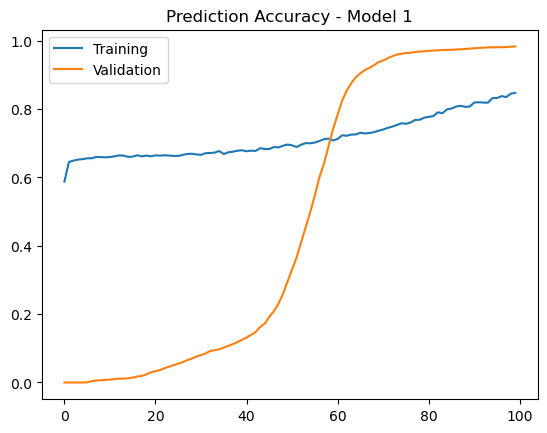

In [9]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='upper left')
plt.title('Prediction Accuracy - Model 1')
plt.show()

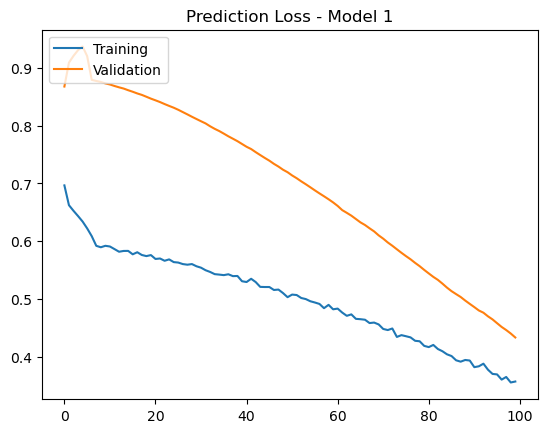

In [10]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper left')
plt.title('Prediction Loss - Model 1')
plt.show()

## 1.4 - NN model training using K-Fold Cross Validation

In [25]:
seed = 7
np.random.seed(seed)

# Define cross validation parameters
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = []

#Split x and y data into k folds
for train, test in k_fold.split(x,y):
    # train the model
    model_crossValid=model_2(len(cols),0.01)
    early_stopping = EarlyStopping(monitor='loss', patience=14)
    rlrop = ReduceLROnPlateau(monitor='loss', factor=0.05, patience=8)
    
    model_crossValid.fit(x[train],y[train], epochs=100, verbose=1,callbacks=[early_stopping,rlrop])
    # model evaluation
    scores = model_crossValid.evaluate(x[test], y[test], verbose=0)
    cv_scores.append(scores[1] * 100)
    print('-'*66)



Epoch 1/100
262/262 [==============================] - 2s 3ms/step - loss: 0.6990 - accuracy: 0.5168 - lr: 0.0100
Epoch 2/100
262/262 [==============================] - 1s 3ms/step - loss: 0.6472 - accuracy: 0.6089 - lr: 0.0100
Epoch 3/100
262/262 [==============================] - 1s 3ms/step - loss: 0.5644 - accuracy: 0.7386 - lr: 0.0100
Epoch 4/100
262/262 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.8515 - lr: 0.0100
Epoch 5/100
262/262 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.9129 - lr: 0.0100
Epoch 6/100
262/262 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.9501 - lr: 0.0100
Epoch 7/100
262/262 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.9635 - lr: 0.0100
Epoch 8/100
262/262 [==============================] - 1s 3ms/step - loss: 0.1146 - accuracy: 0.9743 - lr: 0.0100
Epoch 9/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0843 - accu

262/262 [==============================] - 1s 3ms/step - loss: 0.0081 - accuracy: 0.9984 - lr: 0.0100
Epoch 43/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9976 - lr: 0.0100
Epoch 44/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 0.9982 - lr: 0.0100
Epoch 45/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9982 - lr: 0.0100
Epoch 46/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0089 - accuracy: 0.9980 - lr: 0.0100
Epoch 47/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9986 - lr: 0.0100
Epoch 48/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9982 - lr: 0.0100
Epoch 49/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9980 - lr: 0.0100
Epoch 50/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0067 - accuracy

262/262 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9990 - lr: 2.5000e-05
Epoch 90/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.9992 - lr: 2.5000e-05
Epoch 91/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9996 - lr: 2.5000e-05
Epoch 92/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9993 - lr: 2.5000e-05
Epoch 93/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9989 - lr: 1.2500e-06
Epoch 94/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9996 - lr: 1.2500e-06
Epoch 95/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0027 - accuracy: 0.9992 - lr: 1.2500e-06
Epoch 96/100
262/262 [==============================] - 1s 4ms/step - loss: 0.0041 - accuracy: 0.9989 - lr: 1.2500e-06
Epoch 97/100
262/262 [==============================] - 1s 4m

Epoch 59/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9988 - lr: 2.5000e-05
Epoch 60/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0059 - accuracy: 0.9988 - lr: 2.5000e-05
Epoch 61/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9984 - lr: 2.5000e-05
Epoch 62/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9986 - lr: 2.5000e-05
Epoch 63/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9986 - lr: 2.5000e-05
Epoch 64/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9989 - lr: 2.5000e-05
Epoch 65/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9986 - lr: 2.5000e-05
Epoch 66/100
262/262 [==============================] - 1s 3ms/step - loss: 0.0072 - accuracy: 0.9988 - lr: 2.5000e-05
Epoch 67/100
262/262 [==========================

Cross Validation avg. Accuracy %: ~99.79 (+/- 0.09%) 


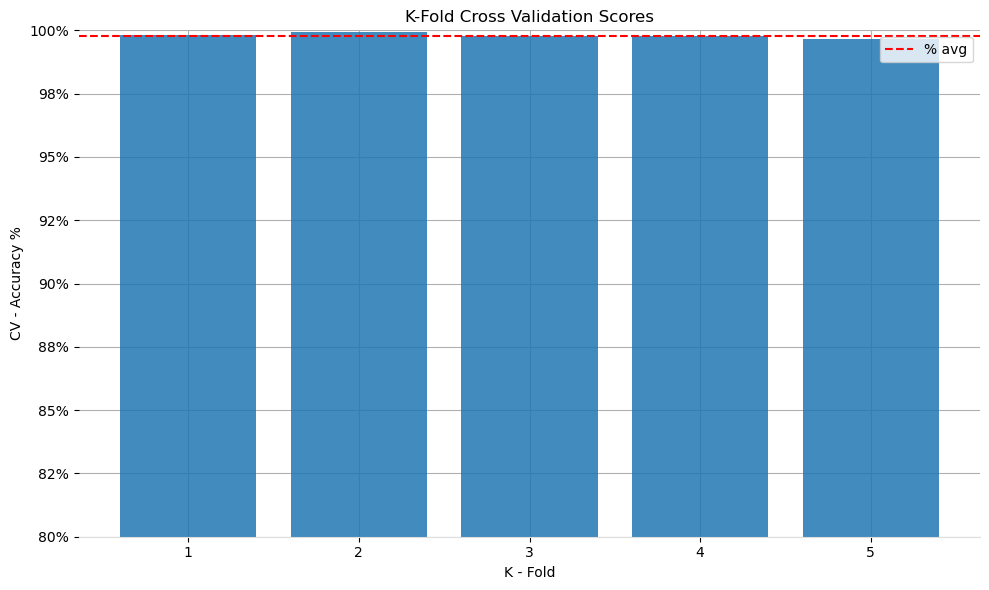

In [27]:
avg = np.mean(cv_scores) 

fig, ax = plt.subplots()
ax.bar(
    x=range(1,len(cv_scores)+1),
    height=cv_scores,
    alpha=0.85
)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

plt.ylim(80, 100) 
plt.axhline(y=avg, color='r', linestyle='--')  

# Second, remove the ticks as well.
# ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.grid()

#plot size
fig.set_figheight(6)
fig.set_figwidth(10)

#Set percentage symbols for y axis
fmt = '%.0f%%'  
yticks = mtick.FormatStrFormatter(fmt)  
plt.gca().yaxis.set_major_formatter(yticks)  

# plt.title('(NN Model) K-Fold Cross Validation Scores')
plt.title('K-Fold Cross Validation Scores')
plt.legend(['% avg'])
plt.xlabel("K - Fold")
plt.ylabel("CV - Accuracy %")

fig.tight_layout()
print("Cross Validation avg. Accuracy %: ~{} (+/- {}%) ".format(round(np.mean(cv_scores),2), round(np.std(cv_scores),2)))

# 2 - Samples Closest to the Median

## 2.1 - Data Preparation

In [11]:
#Extraction of median sequences
def median_sequences(df,samplesNo,total_gut):
    # Obtain the median value for each game
    len_seq=df['playedSpins']
    median_seq=len_seq.groupby('GutsId').median()
    median_seq=len_seq.groupby(level=0).transform('median')  
    len_seq=pd.concat([len_seq.rename('seq_len'), median_seq.rename('median')], axis=1).sort_values(by=['GutsId', 'seq_len'])
        
    # Get the 100 samples closest to the median
    median_samples=[]

    for i in len_seq.loc[total_gut].index.get_level_values(0).unique():
        mask_greater=len_seq.loc[i]['seq_len']>len_seq.loc[i]['median']
        mask_lesser=len_seq.loc[i]['seq_len']<len_seq.loc[i]['median']

        # Append the samples into the median_samples list 
        for j in len_seq.loc[i][mask_lesser].tail(samplesNo).index:
            median_samples.append(j)

        for j in len_seq.loc[i][mask_greater].head(samplesNo).index:
            median_samples.append(j)


            
    median_BitMap= df[df.index.get_level_values(1).isin(median_samples)]  
    return median_BitMap

In [12]:
successful_Gut=[358,307,250,362,254,299,363,268,347]

unsuccessful_Gut=[245,315,221,236, 228,326,290,259,227,308,306
                  ,235,239,325,237,194,249,238,335,359,252]

total_gut=[358,347,307,362,
           235,221,308,306]

median_BitMap=median_sequences(dstr_df,100,total_gut)
median_BitMap

max_PayOut  avg_PayOut  std_PayOut  median_PayOut  \
GutsId SampleId                                                      
221    205223         11.20    0.306239    1.131385            0.0   
       205229         27.24    0.428571    1.764585            0.0   
       205233          8.00    0.292115    1.008265            0.0   
       205246          7.00    0.389248    0.986996            0.0   
       205247         25.12    0.518889    1.867013            0.0   
...                     ...         ...         ...            ...   
362    287909         13.60    0.391295    1.324554            0.0   
       287917         27.00    0.457669    1.896661            0.0   
       287923         10.50    0.335526    1.225682            0.0   
       287924         27.30    0.387695    1.772956            0.0   
       287928         80.00    0.608263    3.902337            0.0   

                 krt_PayOut  skw_PayOut  75th_PayOut  max_WinFeature  \
GutsId SampleId                                                        
221    205223     43.182279    6.138502         0.10          138.86   
       205229    158.702686   11.183184         0.25           39.86   
       205233     36.270139    5.657187         0.10           68.44   
       205246     18.009308    3.879082         0.20           28.76   
       205247     99.627901    8.743279         0.20           19.62   
...                     ...         ...          ...             ...   
362    287909     41.053048    5.874587         0.20           63.60   
       287917     98.627470    8.853783         0.20           36.00   
       287923     40.587536    6.084586         0.10           94.10   
       287924    169.362712   12.003815         0.20           62.50   
       287928    365.751183   18.136507         0.20           22.00   

                 avg_WinFeature  std_WinFeature  ...  std_distinctPayOut  \
GutsId SampleId                                  ...                       
221    205223          0.404840        7.497735  ...            2.903046   
       205229          0.280466        2.834121  ...            4.706045   
       205233          0.388590        4.447811  ...            2.291249   
       205246          0.238496        2.475372  ...            1.845450   
       205247          0.173580        1.495123  ...            4.416107   
...                         ...             ...  ...                 ...   
362    287909          0.387054        3.840175  ...            3.224812   
       287917          0.338037        3.045089  ...            5.435114   
       287923          0.446930        5.043506  ...            3.011394   
       287924          0.438995        3.962636  ...            5.922936   
       287928          0.181780        1.834526  ...           12.075582   

                 median_distinctPayOut  krt_distinctPayOut  \
GutsId SampleId                                              
221    205223                     1.12            1.444585   
       205229                     1.20           23.298570   
       205233                     1.12            1.841460   
       205246                     1.20            1.372201   
       205247                     1.53           15.351347   
...                                ...                 ...   
362    287909                     1.90            2.177958   
       287917                     2.00            8.641253   
       287923                     1.60            0.727425   
       287924                     1.85           11.435979   
       287928                     2.20           37.556769   

                 skw_distinctPayOut  25th_distinctPayOut  75th_distinctPayOut  \
GutsId SampleId                                                                 
221    205223              1.453345                0.490                4.050   
       205229              4.521855                0.530                2.700   
       205233              1.653338              

In [13]:
dstr_df[dstr_df['Success']==0].index.get_level_values(0).unique()

Int64Index([194, 221, 227, 228, 235, 236, 237, 238, 239, 245, 249, 252, 259,
            290, 306, 308, 315, 325, 326, 335, 359],
           dtype='int64', name='GutsId')

In [14]:
display(median_BitMap)

cols=['playedSpins', 'max_Balance', 'max_WinFeature', '75th_Balance',
       '25th_Balance', 'median_Balance', 'avg_Balance', 'max_distinctPayOut',
       'max_PayOut', 'std_Balance', 'max_FreeGames', 'min_Balance',
       'std_WinFeature', 'krt_LDW', 'std_distinctPayOut', 'krt_WinFeature',
       'std_PayOut', 'krt_Balance', 'krt_FreeGames', 'count_distinctPayOut',
       'max_cont_spins', 'num_strikes', 'krt_PayOut', 'krt_NearMiss',
       'min_LStreak', 'avg_LStreak', 'std_LStreak', '75th_LStreak',
       'median_LStreak', 'avg_distinctPayOut', 'krt_WinLevel', 'mode_LStreak',
       '75th_distinctPayOut', 'krt_distinctPayOut', 'std_FreeGames',
       '25th_LStreak', 'skw_LDW', 'avg_WinFeature', 'skw_Balance',
       'krt_LStreak', 'krt_WStreak', 'skw_WinFeature', 'skw_WinLevel',
       'median_distinctPayOut', 'max_WStreak', '25th_distinctPayOut',
       'skw_NearMiss', 'avg_PayOut', 'skw_PayOut']

# cols=median_BitMap.columns[:-1]
x=median_BitMap[cols].values#.loc[:, NN_d.columns!='Success'].values#[cols].values
y=median_BitMap.loc[:, median_BitMap.columns=='Success'].values

# y_train=[]
# [y_train.append(i[0]) for i in y]

x = StandardScaler().fit_transform(x)
print('No. of columns to train: ',len(cols))


print(median_BitMap['Success'].value_counts())

max_PayOut  avg_PayOut  std_PayOut  median_PayOut  \
GutsId SampleId                                                      
221    205223         11.20    0.306239    1.131385            0.0   
       205229         27.24    0.428571    1.764585            0.0   
       205233          8.00    0.292115    1.008265            0.0   
       205246          7.00    0.389248    0.986996            0.0   
       205247         25.12    0.518889    1.867013            0.0   
...                     ...         ...         ...            ...   
362    287909         13.60    0.391295    1.324554            0.0   
       287917         27.00    0.457669    1.896661            0.0   
       287923         10.50    0.335526    1.225682            0.0   
       287924         27.30    0.387695    1.772956            0.0   
       287928         80.00    0.608263    3.902337            0.0   

                 krt_PayOut  skw_PayOut  75th_PayOut  max_WinFeature  \
GutsId SampleId                                                        
221    205223     43.182279    6.138502         0.10          138.86   
       205229    158.702686   11.183184         0.25           39.86   
       205233     36.270139    5.657187         0.10           68.44   
       205246     18.009308    3.879082         0.20           28.76   
       205247     99.627901    8.743279         0.20           19.62   
...                     ...         ...          ...             ...   
362    287909     41.053048    5.874587         0.20           63.60   
       287917     98.627470    8.853783         0.20           36.00   
       287923     40.587536    6.084586         0.10           94.10   
       287924    169.362712   12.003815         0.20           62.50   
       287928    365.751183   18.136507         0.20           22.00   

                 avg_WinFeature  std_WinFeature  ...  std_distinctPayOut  \
GutsId SampleId                                  ...                       
221    205223          0.404840        7.497735  ...            2.903046   
       205229          0.280466        2.834121  ...            4.706045   
       205233          0.388590        4.447811  ...            2.291249   
       205246          0.238496        2.475372  ...            1.845450   
       205247          0.173580        1.495123  ...            4.416107   
...                         ...             ...  ...                 ...   
362    287909          0.387054        3.840175  ...            3.224812   
       287917          0.338037        3.045089  ...            5.435114   
       287923          0.446930        5.043506  ...            3.011394   
       287924          0.438995        3.962636  ...            5.922936   
       287928          0.181780        1.834526  ...           12.075582   

                 median_distinctPayOut  krt_distinctPayOut  \
GutsId SampleId                                              
221    205223                     1.12            1.444585   
       205229                     1.20           23.298570   
       205233                     1.12            1.841460   
       205246                     1.20            1.372201   
       205247                     1.53           15.351347   
...                                ...                 ...   
362    287909                     1.90            2.177958   
       287917                     2.00            8.641253   
       287923                     1.60            0.727425   
       287924                     1.85           11.435979   
       287928                     2.20           37.556769   

                 skw_distinctPayOut  25th_distinctPayOut  75th_distinctPayOut  \
GutsId SampleId                                                                 
221    205223              1.453345                0.490                4.050   
       205229              4.521855                0.530                2.700   
       205233              1.653338              

No. of columns to train:  49
0    800
1    800
Name: Success, dtype: int64


In [15]:
median_BitMap.index.get_level_values(0).unique()

Int64Index([221, 235, 306, 307, 308, 347, 358, 362], dtype='int64', name='GutsId')

## 2.2 - Model Training

In [16]:
# model_med=model_2(len(cols),0.05)
model_med=model_adam(len(cols),0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=160)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=6)

history_med=model_med.fit(x,y,validation_split=0.2, epochs=100, verbose=1, callbacks=[early_stopping,rlrop])

Epoch 1/100
40/40 [==============================] - 2s 10ms/step - loss: 0.6599 - accuracy: 0.6250 - val_loss: 0.7724 - val_accuracy: 0.2969 - lr: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4799 - accuracy: 0.7383 - val_loss: 0.6683 - val_accuracy: 0.7094 - lr: 0.0010
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2844 - accuracy: 0.8734 - val_loss: 0.2716 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 7ms/step - loss: 0.1714 - accuracy: 0.9367 - val_loss: 0.0673 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1011 - accuracy: 0.9609 - val_loss: 0.0366 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0592 - accuracy: 0.9828 - val_loss: 0.0076 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.

Epoch 53/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9984 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 7.8125e-13
Epoch 54/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.9984 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 7.8125e-13
Epoch 55/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 3.9063e-14
Epoch 56/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9953 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 3.9063e-14
Epoch 57/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9937 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 3.9063e-14
Epoch 58/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0098 - val_accuracy: 0.9969 - lr: 3.9063e-14
Epoch 59/100
40/40 [==========================

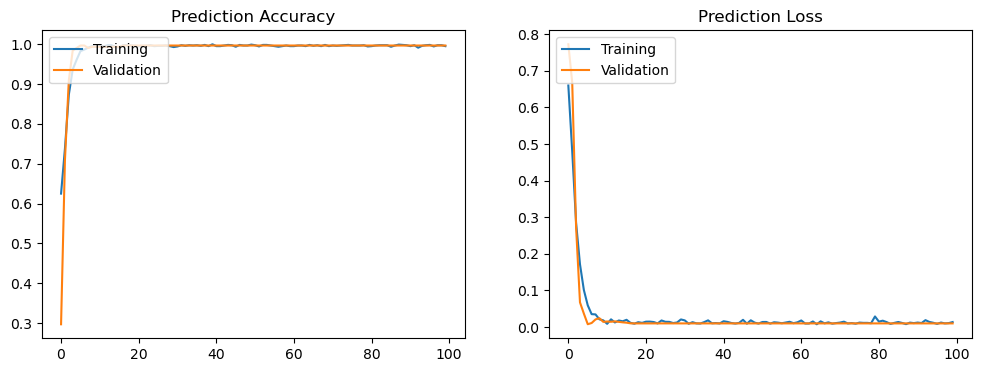

In [17]:

plt.figure(figsize=(12, 4)) 

# Plot the first plot  
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1  
plt.plot(history_med.history['accuracy'])
plt.plot(history_med.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='upper left')
plt.title('Prediction Accuracy')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2  
plt.plot(history_med.history['loss'])
plt.plot(history_med.history['val_loss'])
plt.legend(['Training', 'Validation'], loc='upper left')
plt.title('Prediction Loss')
plt.show()

plt.show()

In [356]:
# # Define colors based on the values in the 'success' column  
# colors = {1: 'green', 0: 'red'}  
  
# # Plot the 'vals' column with different colors based on 'success' column  
# plt.scatter(range(len(median_BitMap)), median_BitMap['playedSpins'], c=median_BitMap['Success'].map(colors))  
  
# # Add labels and title to the plot  
# plt.xlabel('Index')  
# plt.ylabel('vals')  
# plt.title('Values in "vals" column with different colors based on "success" column')  
  
# # Show the plot  
# plt.show()  


median_BitMap.groupby('Success')['playedSpins'].describe()

,count,mean,std,min,25%,50%,75%,max
Success,,,,,,,,
0,800.0,306.41125,49.713795,218.0,270.0,300.0,340.00,439.0
1,800.0,552.50250,95.880649,409.0,476.0,528.0,630.25,772.0


# 3 - NN Model testing

## 3.1 - Test Model on Unseen Data

In [18]:
# #read from csv file
unseen_df = pd.read_csv('csv_files\\unseen_800.csv')
unseen_df=unseen_df.set_index(['GutsId', 'SampleId'])
display(unseen_df)
print(unseen_df.index.get_level_values(0).unique(),'\n')
print(unseen_df['Success'].value_counts())


min_PayOut  max_PayOut  avg_PayOut  std_PayOut  \
GutsId SampleId                                                   
191    219671           0.0       22.50    0.612862    2.026624   
       219672           0.0       21.00    0.586950    1.893502   
       219673           0.0       12.84    0.571576    1.659182   
       219674           0.0       19.44    0.560100    1.759040   
       219675           0.0       11.25    0.543243    1.541721   
...                     ...         ...         ...         ...   
351    12009            0.0       97.00    0.818250    5.523727   
       12010            0.0        4.80    0.264706    0.757337   
       12011            0.0       96.00    0.748500    4.723445   
       12012            0.0       10.20    0.435359    1.173820   
       12014            0.0        6.60    0.362286    0.972114   

                 median_PayOut  mode_PayOut  krt_PayOut  skw_PayOut  \
GutsId SampleId                                                       
191    219671              0.0          0.0   56.711771    6.812945   
       219672              0.0          0.0   50.407456    6.458138   
       219673              0.0          0.0   24.285032    4.653674   
       219674              0.0          0.0   43.937970    5.867721   
       219675              0.0          0.0   25.270645    4.736724   
...                        ...          ...         ...         ...   
351    12009               0.0          0.0  235.469031   14.534814   
       12010               0.0          0.0   21.359690    4.360992   
       12011               0.0          0.0  261.849228   15.031623   
       12012               0.0          0.0   29.818033    4.754219   
       12014               0.0          0.0   14.973768    3.648255   

                 25th_PayOut  75th_PayOut  ...  std_distinctPayOut  \
GutsId SampleId                            ...                       
191    219671            0.0         0.30  ...            5.595691   
       219672            0.0         0.36  ...            5.229817   
       219673            0.0         0.30  ...            3.788412   
       219674            0.0         0.30  ...            5.002401   
       219675            0.0         0.39  ...            3.131021   
...                      ...          ...  ...                 ...   
351    12009             0.0         0.20  ...           23.297842   
       12010             0.0         0.20  ...            1.455918   
       12011             0.0         0.20  ...           19.243204   
       12012             0.0         0.20  ...            2.369149   
       12014             0.0         0.20  ...            1.835115   

                 median_distinctPayOut  krt_distinctPayOut  \
GutsId SampleId                                              
191    219671                    2.340            2.881678   
       219672                    1.860            2.529253   
       219673                    2.025            0.050876   
       219674                    2.175            1.975961   
       219675                    1.200            1.228543   
...                                ...                 ...   
351    12009                     4.100            8.592116   
       12010                     1.100            1.380145   
       12011                     4.100           11.658312   
       12012                     2.000            5.888046   
       12014                     1.800            0.478289   

                 skw_distinctPayOut  25th_distinctPayOut  75th_distinctPayOut  \
GutsId SampleId                                                                 
191    219671              1.833985               1.0500               6.0000   
       219672              1.772963               0.9900               6.1875   
       219673              1.108085               0.9450               6.1500   
       219674              1.574862               0.8775               6.4500   
       219675    

Int64Index([191, 197, 220, 224, 227, 232, 259, 272, 316, 319, 341, 351], dtype='int64', name='GutsId') 

1    13385
0     5931
Name: Success, dtype: int64


In [19]:
NN_unseen=unseen_df.copy()

x_unseen=NN_unseen[cols].values#.loc[:, NN_test.columns!='Success'].values#[cols].values
y_unseen=NN_unseen.loc[:, NN_unseen.columns=='Success'].values
x_unseen = StandardScaler().fit_transform(x_unseen)

y_unseen_predict=np.round(model_med.predict(x_unseen))

604/604 [==============================] - 1s 2ms/step


Successful Games acc:  45.0 %
Unsuccessful Games acc:  60.0 %


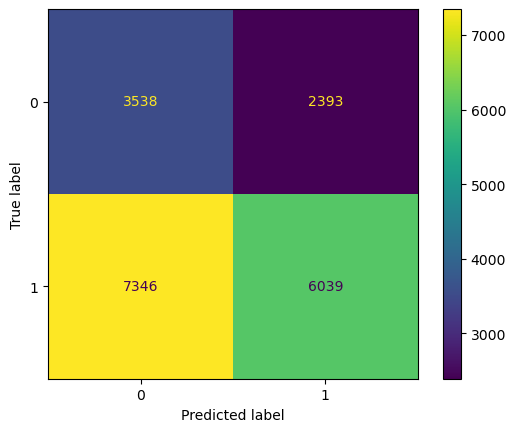

In [340]:
results_unseen = confusion_matrix(y_unseen, y_unseen_predict)
s_acc_u=results_unseen[1][1]/sum(results_unseen[1])
u_acc_u=results_unseen[0][0]/sum(results_unseen[0])
print('Successful Games acc: ',np.round(s_acc_u*100),'%')
print('Unsuccessful Games acc: ',np.round(u_acc_u*100),'%')
cm_display_u = ConfusionMatrixDisplay(results_unseen).plot()

## 3.2 - Test Model On Unseen Data Close to its Median

In [21]:
sam=[i for i in dstr_df.index.get_level_values(0).unique() if i not in  median_BitMap.index.get_level_values(0).unique()]
print(sam)
unseen_df.index.get_level_values(0).unique()

[194, 227, 228, 236, 237, 238, 239, 245, 249, 250, 252, 254, 259, 268, 290, 299, 315, 325, 326, 335, 359, 363]


Int64Index([191, 197, 220, 224, 227, 232, 259, 272, 316, 319, 341, 351], dtype='int64', name='GutsId')

In [22]:
df_median_unseen=pd.concat([unseen_df,dstr_df.loc[[194,228,236,237,
                                                   254,250,268,299,]]])
total_gut=df_median_unseen.index.get_level_values(0).unique()
df_median_unseen=median_sequences(df_median_unseen,100,total_gut)



x_unseen_med=df_median_unseen[cols].values
y_unseen_med=df_median_unseen.loc[:, df_median_unseen.columns=='Success'].values
x_unseen_med = StandardScaler().fit_transform(x_unseen_med)

y_unseen_predict_med=np.round(model_med.predict(x_unseen_med))

125/125 [==============================] - 0s 2ms/step


Successful Games acc:  72.0 %
Unsuccessful Games acc:  65.0 %


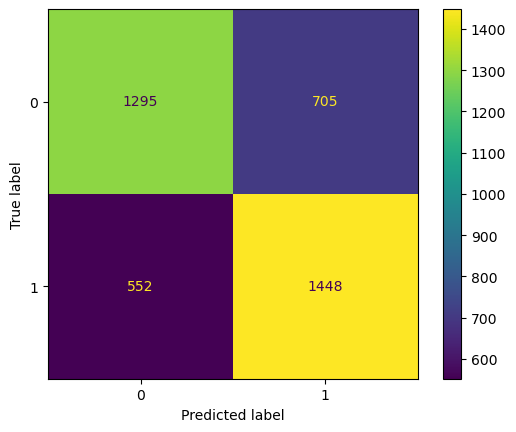

In [388]:
results_unseen_med = confusion_matrix(y_unseen_med, y_unseen_predict_med)
s_acc_u=results_unseen_med[1][1]/sum(results_unseen_med[1])
u_acc_u=results_unseen_med[0][0]/sum(results_unseen_med[0])
print('Successful Games acc: ',np.round(s_acc_u*100),'%')
print('Unsuccessful Games acc: ',np.round(u_acc_u*100),'%')
cm_display_u = ConfusionMatrixDisplay(results_unseen_med).plot()

## 3.3 - Predictions average per game

In [25]:

count_pred=[]
df1=df_median_unseen.copy()

for i in df1.index.get_level_values(0).unique():
    x_=df1.loc[i][cols].values
    x_=StandardScaler().fit_transform(x_)
    
    print('For the game: {}'.format(i))
    predicted_vals_raw=np.mean(model_med.predict(x_))
    real_y=df1.loc[i]['Success'].unique()[0]
    predicted_vals=np.round(np.mean(predicted_vals_raw))
    
    print('The model prediction was: {}\nThe real value is: {}\nPrediction %: {}\n'.format(predicted_vals,real_y,predicted_vals_raw))
    
    if predicted_vals==real_y:
        count_pred.append(1)
    else:
        count_pred.append(0)
    print('-'*88)
    
print('\nHits: ')
print(pd.Series(count_pred).value_counts())

For the game: 191
7/7 [==============================] - 0s 3ms/step
The model prediction was: 1.0
The real value is: 1
Prediction %: 0.5108996033668518

----------------------------------------------------------------------------------------
For the game: 197
7/7 [==============================] - 0s 2ms/step
The model prediction was: 1.0
The real value is: 1
Prediction %: 0.5204727649688721

----------------------------------------------------------------------------------------
For the game: 220
7/7 [==============================] - 0s 3ms/step
The model prediction was: 0.0
The real value is: 0
Prediction %: 0.43644118309020996

----------------------------------------------------------------------------------------
For the game: 224
7/7 [==============================] - 0s 3ms/step
The model prediction was: 0.0
The real value is: 0
Prediction %: 0.4954904615879059

----------------------------------------------------------------------------------------
For the game: 227
7/7 [====

# Save Trained Model

In [395]:
# save the model to disk

model_pkl = "close_to_medians_model.pkl"  

with open(model_pkl, 'wb') as file:  
    pickle.dump(model_med, file)